In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
data = pd.read_csv(open('hum.csv', 'r'), quotechar='"', skipinitialspace=True)
data.date = pd.to_datetime(data.date)
data.index = data.date
del data['date'], data['tpc']
data.columns = ['hum']
data.head(10)

,hum
date,
2017-01-13 00:00:01.467,35.7
2017-01-13 00:00:11.134,35.7
2017-01-13 00:00:21.248,35.7
2017-01-13 00:00:31.314,35.7
2017-01-13 00:00:41.412,35.7
2017-01-13 00:00:51.629,35.7
2017-01-13 00:01:01.750,35.7
2017-01-13 00:01:11.808,35.7
2017-01-13 00:01:13.999,35.8


In [3]:
print(data['hum'].max())
print(data['hum'].min())

97.8
20.0


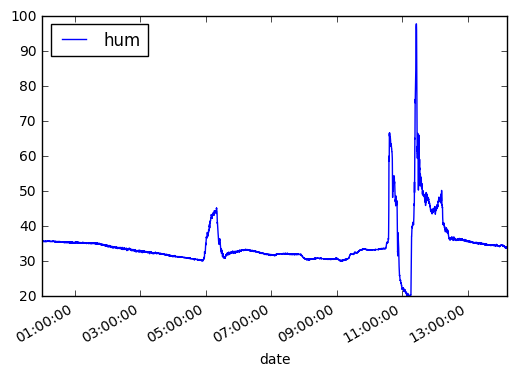

In [4]:
data.plot()
plt.show()

In [5]:
avg = data.resample("1min").mean()

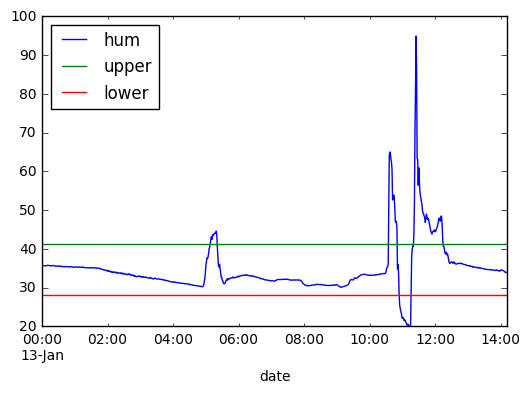

In [6]:
avg['upper'] = avg.hum.mean() + avg.hum.std()
avg['lower'] = avg.hum.mean() - avg.hum.std()
avg.plot()
plt.show()

In [7]:
showers = avg[avg.hum > (avg.hum.mean() + avg.hum.std())].copy()

In [8]:
searchNewShower = True
lastDate = showers.index[0]
j = 0 

print("someone showerd and for how long")

for date, r in showers.iterrows(): # Attention! following is real ugly code!
    if(searchNewShower):
        begin = date
        searchNewShower = False
    if(date - lastDate > pd.Timedelta('1min') or j == len(showers) -1 ):
        end = lastDate
        searchNewShower = True
        print(begin, end - begin)
    lastDate = date
    j += 1

someone showerd and for how long
2017-01-13 05:08:00 0 days 00:12:00
2017-01-13 10:36:00 0 days 00:14:00
2017-01-13 11:22:00 0 days 00:51:00
